In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import sqlite3

In [7]:
con=sqlite3.connect(r'E:\data analysis projects/database.sqlite')

In [8]:
type(con)

sqlite3.Connection

In [9]:
df=pd.read_sql_query('select * from Reviews',con)

In [10]:
df.shape

(568454, 10)

In [11]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
df['HelpfulnessNumerator']> df['HelpfulnessDenominator']                     #invalid rows

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [13]:
df[df['HelpfulnessNumerator']> df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [14]:
df_valid=df[df['HelpfulnessNumerator']<= df['HelpfulnessDenominator']]                     #valid rows

In [15]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [16]:
df.duplicated(['UserId', 'ProfileName','Time','Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [17]:
df_valid[df.duplicated(['UserId', 'ProfileName','Time','Text'])]

C:\Users\DELL\AppData\Local\Temp\ipykernel_11284\2990420473.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_valid[df.duplicated(['UserId', 'ProfileName','Time','Text'])]


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [18]:
data=df_valid.drop_duplicates(subset=['UserId', 'ProfileName','Time','Text'])

In [19]:
data.shape

(393931, 10)

In [20]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [21]:
data['Time']=pd.to_datetime(data['Time'],unit='s')

C:\Users\DELL\AppData\Local\Temp\ipykernel_11284\796006669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time']=pd.to_datetime(data['Time'],unit='s')


In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
data.dtypes

Id                                 int64
ProductId                         object
UserId                            object
ProfileName                       object
HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Time                      datetime64[ns]
Summary                           object
Text                              object
dtype: object

In [24]:
data['ProfileName'].unique()

array(['delmartian', 'dll pa', 'Natalia Corres "Natalia Corres"', ...,
       'Lettie D. Carter', 'pksd "pk_007"', 'srfell17'], dtype=object)

In [25]:
data['ProfileName'].nunique()

218418

In [26]:
data['UserId'].nunique()

256059

In [27]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [28]:
recommend_df=data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='ProductId',ascending=False)

In [29]:
recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [30]:
recommend_df.columns=['No_of_summaries','No_of_text','Avg_Score','Total_products_purchased']

In [31]:
recommend_df

,No_of_summaries,No_of_text,Avg_Score,Total_products_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [32]:
recommend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [33]:
recommend_df['Total_products_purchased'][0:10]

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
A2MUGFV2TDQ47K    161
A3D6OI36USYOU1    146
AZV26LP92E6WU     129
AKMEY1BSHSDG7     119
A2GEZJHBV92EVR    118
Name: Total_products_purchased, dtype: int64

In [34]:
recommend_df['Total_products_purchased'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

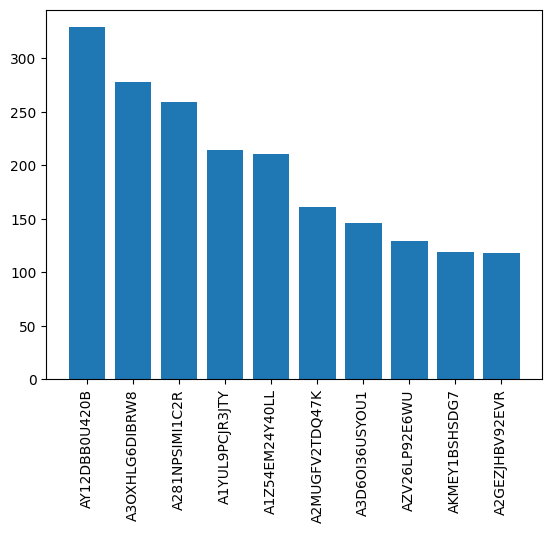

In [35]:
plt.bar(x=recommend_df.index[0:10],height=recommend_df['Total_products_purchased'][0:10].values)
plt.xticks(rotation='vertical')

In [36]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [37]:
data['ProductId'].unique()

array(['B001E4KFG0', 'B00813GRG4', 'B000LQOCH0', ..., 'B003S1WTCU',
       'B004I613EE', 'B001LR2CU2'], dtype=object)

In [38]:
data['ProductId'].nunique()

67624

In [40]:
prod_count=data['ProductId'].value_counts().to_frame()

In [41]:
prod_count

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1


In [46]:
prod_count['count'] >500

ProductId
B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B001EO5Q64     True
B0013NUGDE     True
              ...  
B002DNX4GO    False
B000FM2YU2    False
B001M1VA32    False
B009858H6M    False
B001LR2CU2    False
Name: count, Length: 67624, dtype: bool

In [47]:
prod_count[prod_count['count'] >500]

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [51]:
freq_index=prod_count[prod_count['count'] >500].index

In [52]:
freq_index

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [53]:
data['ProductId'].isin(freq_index)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [55]:
freq_df=data[data['ProductId'].isin(freq_index)]

In [56]:
freq_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


<Axes: xlabel='count', ylabel='ProductId'>

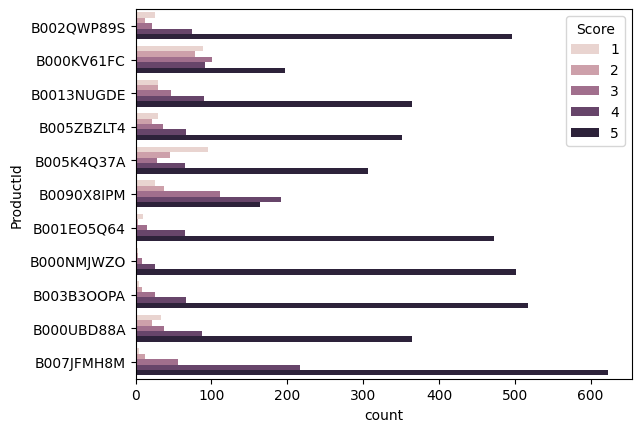

In [61]:
sns.countplot(y='ProductId',data=freq_df, hue='Score')

In [62]:
x=data['UserId'].value_counts()

In [63]:
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [65]:
data['Viewer Type']=data['UserId'].apply(lambda user :'Frequent' if x[user]>50 else 'Not Frequent' )

In [66]:
data['Viewer Type']

0         Not Frequent
1         Not Frequent
2         Not Frequent
3         Not Frequent
4         Not Frequent
              ...     
568449    Not Frequent
568450    Not Frequent
568451    Not Frequent
568452    Not Frequent
568453    Not Frequent
Name: Viewer Type, Length: 393931, dtype: object

In [68]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer Type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent


In [71]:
not_freq_df=data[data['Viewer Type']=='Not Frequent']
freq_df=data[data['Viewer Type']=='Frequent']

<Axes: xlabel='Score'>

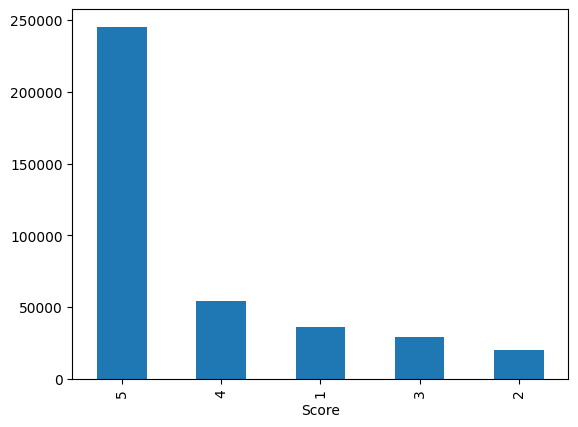

In [78]:
not_freq_df['Score'].value_counts().plot(kind='bar')

In [75]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100     #percentage

Score
5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: count, dtype: float64

<Axes: xlabel='Score'>

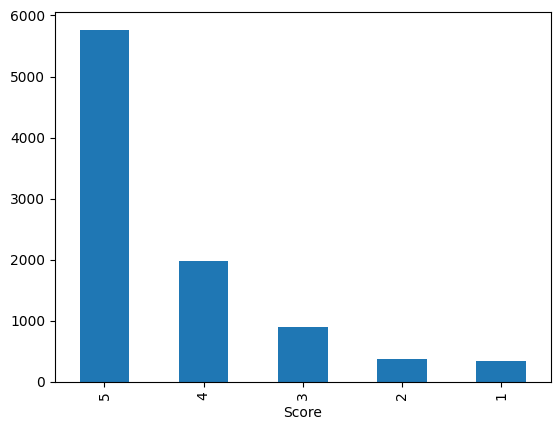

In [77]:
freq_df['Score'].value_counts().plot(kind='bar')

In [76]:
freq_df['Score'].value_counts()/len(freq_df)*100

Score
5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: count, dtype: float64

In [80]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Viewer Type'],
      dtype='object')

In [82]:
data[['UserId','ProductId','Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [83]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [84]:
type(data['Text'][0])

str

In [89]:
type(data['Text'][0].split(' '))

list

In [90]:
len(data['Text'][0].split(' '))

49

In [91]:
def cal_length(text):
    return len(text.split(' '))

In [92]:
data['Text_len']=data['Text'].apply(cal_length)

In [93]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer Type,Text_len
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99


In [94]:
not_freq_data=data[data['Viewer Type']=='Not Frequent']
freq_data=data[data['Viewer Type']=='Frequent']

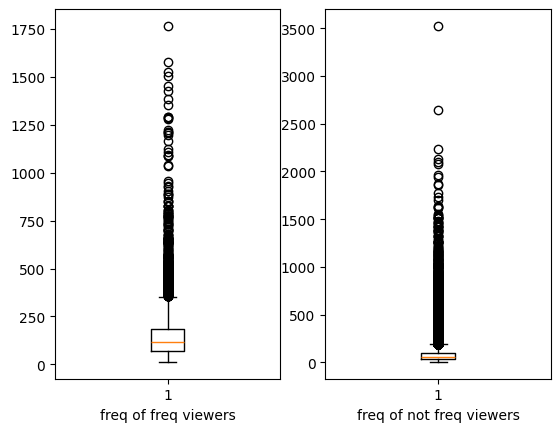

In [99]:
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.boxplot(freq_data['Text_len'])
ax1.set_xlabel('freq of freq viewers')

ax2=fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_len'])
ax2.set_xlabel('freq of not freq viewers')

plt.show()

# Sentiment Analysis

In [100]:
!pip install textblob

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------  41.0/41.5 kB ? eta -:--:--
     ---------------------------------------  41.0/41.5 kB ? eta -:--:--
     ---------------------------------------  41.0/41.5 kB ? eta -:--:--
     -------------------------------------- 41.5/41.5 kB 182.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.6 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.6 kB ? eta -:--:--
     -------------------------------------- 57.6/57.6 kB 508.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --------------------------- ------------ 430.1/626.3 kB 9.1 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 6.6 MB/s eta 0:00:00
   -----------------

In [102]:
from textblob import TextBlob

In [103]:
data['Summary'][0]

'Good Quality Dog Food'

In [104]:
TextBlob('Good Quality Dog Food').sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [105]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [106]:
sample = data[0:50000]

In [107]:
polarity=[]

for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [108]:
len(polarity)

50000

In [109]:
sample['polarity']= polarity

In [110]:
sample.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer Type,Text_len,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0


In [116]:
sample['polarity']<0


0        False
1        False
2        False
3        False
4        False
         ...  
54249    False
54250    False
54251     True
54252    False
54253    False
Name: polarity, Length: 50000, dtype: bool

In [117]:
sample_neg=sample[sample['polarity']<0]

In [118]:
sample['polarity']>0


0         True
1        False
2        False
3        False
4         True
         ...  
54249     True
54250     True
54251    False
54252     True
54253     True
Name: polarity, Length: 50000, dtype: bool

In [119]:
sample_pos=sample[sample['polarity']>0]


In [120]:
sample_neg['Summary']

16                  poor taste
26             Nasty No flavor
57       How can you go wrong!
61            pretty expensive
62              stale product.
                 ...          
54185                 Horrible
54186            Horrible idea
54191                    STALE
54212             Disappointed
54251      Just not very good!
Name: Summary, Length: 4658, dtype: object

In [121]:
sample_pos['Summary']

0                                Good Quality Dog Food
4                                          Great taffy
5                                           Nice Taffy
6        Great!  Just as good as the expensive brands!
7                               Wonderful, tasty taffy
                             ...                      
54248                 My favorite nescafe dolce flavor
54249                                  My 2nd Favorite
54250                      Best of 5 flavors available
54252                                 pricey but good.
54253                         Best I have found so far
Name: Summary, Length: 29155, dtype: object

In [122]:
from collections import Counter      #for counting words

In [123]:
Counter(sample_pos['Summary'])

Counter({'Delicious!': 208,
         'Delicious': 204,
         'Great product': 100,
         'Excellent': 85,
         'Love it!': 81,
         'Great': 81,
         'Great Product': 77,
         'Great!': 70,
         'Good stuff': 51,
         'Awesome': 50,
         'Excellent!': 44,
         'Good Stuff': 44,
         'The Best': 43,
         'great product': 43,
         'Great Coffee': 43,
         'Awesome!': 43,
         'Love it': 37,
         'Wonderful': 35,
         'Good': 34,
         'Fantastic!': 34,
         'Amazing': 34,
         'Great product!': 34,
         'Great taste': 34,
         'Good product': 33,
         'Perfect': 32,
         'delicious': 31,
         'Great Tea': 31,
         'Great coffee': 31,
         'Excellent product': 31,
         'Very good': 29,
         'Wonderful!': 28,
         'Fantastic': 28,
         'Amazing!': 27,
         'Excellent Product': 27,
         'Love these!': 25,
         'great': 25,
         'Perfect!': 25,
         'gr

In [125]:
Counter(sample_pos['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]

In [126]:
Counter(sample_neg['Summary'])

Counter({'Disappointed': 44,
         'Disappointing': 32,
         'Bland': 18,
         'Awful': 17,
         'Not what I expected': 17,
         'Terrible': 15,
         'Horrible': 15,
         'disappointed': 15,
         'Disgusting': 12,
         'not good': 11,
         "Don't waste your money": 11,
         'Not good': 10,
         'Very Disappointed': 10,
         'disappointing': 9,
         'Not worth the money': 9,
         'Not Good': 8,
         'Not very good': 8,
         'Not impressed': 8,
         'Nasty': 8,
         'Stale': 7,
         'Bitter': 6,
         'Waste of money': 6,
         'Hard to find': 6,
         'Mediocre': 6,
         'Weak': 6,
         'AWFUL': 5,
         'Addicted': 5,
         'awful': 5,
         'Poor Quality': 5,
         'Not worth it': 5,
         'Not great': 5,
         'Bad aftertaste': 5,
         'Bad': 4,
         'Disappointed!': 4,
         'too expensive': 4,
         'Tasteless': 4,
         'Terrible!': 4,
         'Not to

In [127]:
Counter(sample_neg['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]